# kmer-based models for comparison

Maps input sequences into kmer space, then trains standard learning models.

I've been running these locally and with the exception of the SGDRegressor, they are very
slow to train... I have actually never trained the SVM...

Increasing k tends to help, but the memory requirements quickly get quite large.
My machine runs out of memory with k=5.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from mrpa_data import MrpaData
data = MrpaData()

mrpa_data.py:115: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNNNNNNGATCCCGCGGCCGTGTTTTCCTGGTGGCCCGGCCGTGCCTGAGGTTTCTCCCCGAGCCGCCGCCTCTGCGGGCTCCCGGGTGCCCTTGCCCTCACGGTCCCCGGCCCTCGCCCGTCTGTGCCCTCTTCCCCGCCCG.
  warn("Replacing 'N' bases in seq with 'A' in seq {}.".format(seq))
mrpa_data.py:115: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNGATCCCGCGGCCGTGTTTTCCTGGTGGCCCGGCCGTGCCTGAGGTTTCTCCCCGAGCCGCCGCCTCTGCGGGCTCCCGGGTGCCCTTGCCCTCACGGTCCCCGGCCCTCGCCCGTCTGTGCCCTCTTCCCCGCCCGCCGCC.
  warn("Replacing 'N' bases in seq with 'A' in seq {}.".format(seq))
mrpa_data.py:115: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNNNNNNNNNNNNNNNGAATTCAATGGAGTGGACTGGAGTGCTGTGGGGTGGAGTGGAATGGAGTGTAGTTGAATGGAGTGGAATGGAATGCGATGGAATGGAGTGGAGTTGAGCAGAGTGAAGTGGAAAGGTGTAGAATGGA.
  warn("Replacing 'N' bases in seq with 'A' in seq {}.".format(seq))
mrpa_data.py:115: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNNNNNNNNNNGAATTCAATGGAGTGGACTGGAGTGCTGTGGGGTGGAGTGGAA

In [3]:
def kmerize(seq, k):
    """
    Returns np.array of kmer counts corresponding to given seq
    """
    bases = {'A': '00', 'C': '01', 'G': '10', 'T': '11'}
    binary_seq = ''.join([bases[char] for char in seq])
    counts = np.zeros((4**k,))
    for i in range(0, len(seq) - k + 1):
        counts[int(''.join(binary_seq[i*2:(i+k)*2]), 2)] += 1
    return counts

In [4]:
X = np.array([kmerize(data.seqs[key], 6) for key in data.valid_keys])
y = data.y_multitask()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.75, random_state=42
)

In [6]:
def print_errors(models):
    for task, model in enumerate(models):
        mse =  sum([(i-j) **2 for i, j in zip (model.predict(X_valid), y_valid[:, task])]) / float(y_valid.shape[0])
        var = np.var(y_valid[:, task])
        print "MSE is {} and var is {}".format(mse, var)
        
def plot_predictions(models):
    for task, model in enumerate(models):
        plt.scatter(model.predict(X_valid), y_valid[:, task])
        plt.show()

In [7]:
from sklearn.linear_model import SGDRegressor
sgd_models = []
for task in range(y.shape[1]):
    sgd_models += [SGDRegressor().fit(X_train, y_train[:, task])]

MSE is 1.1570415256 and var is 1.30343331119
MSE is 2.03378740731 and var is 2.23388560182
MSE is 2.3462144571 and var is 2.37531001238
MSE is 3.45730772391 and var is 3.86850276205


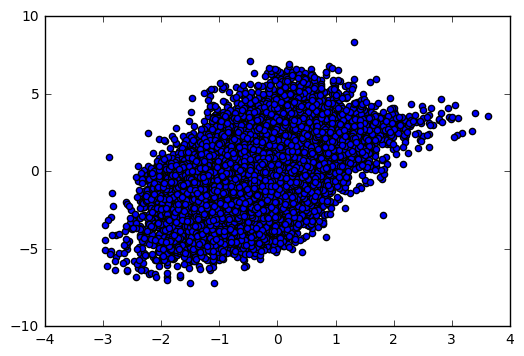

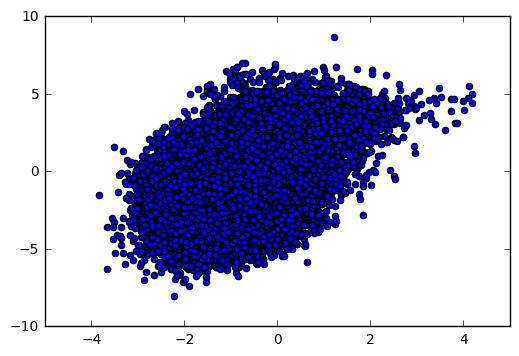

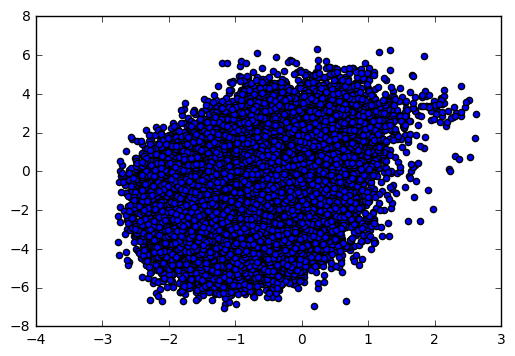

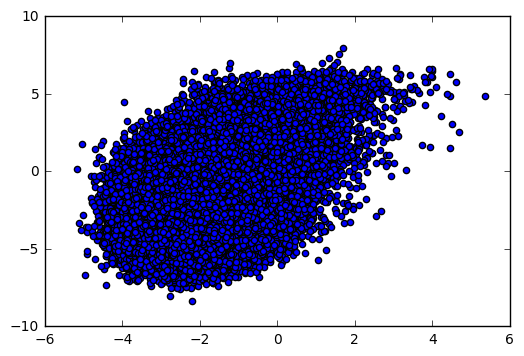

In [8]:
print_errors(sgd_models)
plot_predictions(sgd_models)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_models = []
for task in range(y.shape[1]):
    rf_models += [RandomForestRegressor(n_estimators = 50, n_jobs=2).fit(X_train, y_train[:, task])]
print_errors(rf_models)

In [ ]:
from sklearn.svm import SVR
svm_models = []
for task in range(y.shape[1]):
    svm_models += [SVR().fit(X_train, y_train[:, task])]
print_errors(svm_models)